In [1]:
pip install statsmodels

You should consider upgrading via the 'C:\Users\Will Campbell\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
%%html
<iframe src="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" width="1200" height="1000"></iframe>

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [3]:
# Change the path
dataset = pd.read_csv('Advertising.csv')

In [4]:
dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


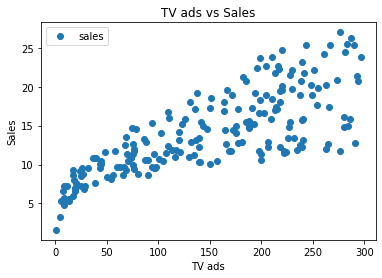

In [6]:
# Input vs Output
dataset.plot(x='TV', y='sales', style='o')  
plt.title('TV ads vs Sales')  
plt.xlabel('TV ads')  
plt.ylabel('Sales')  
plt.show()

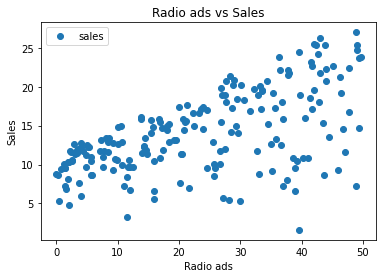

In [7]:
# Input vs Output
dataset.plot(x='radio', y='sales', style='o')  
plt.title('Radio ads vs Sales')  
plt.xlabel('Radio ads')  
plt.ylabel('Sales')  
plt.show()

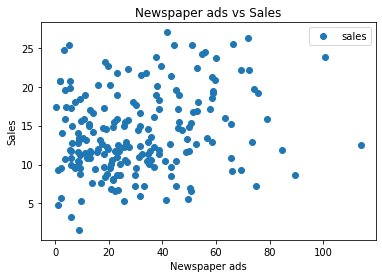

In [8]:
# Input vs Output
dataset.plot(x='newspaper', y='sales', style='o')  
plt.title('Newspaper ads vs Sales')  
plt.xlabel('Newspaper ads')  
plt.ylabel('Sales')  
plt.show()

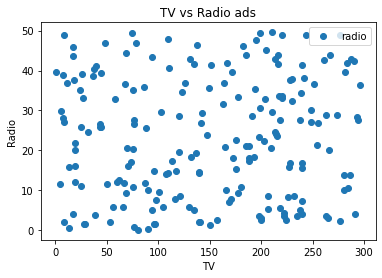

In [9]:
# Input vs Input
dataset.plot(x='TV', y='radio', style='o')  
plt.title('TV vs Radio ads')  
plt.xlabel('TV')  
plt.ylabel('Radio')  
plt.show()

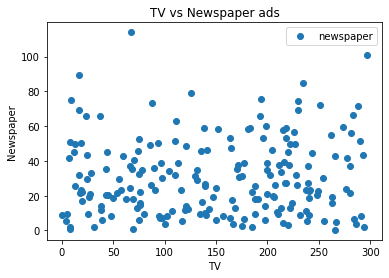

In [10]:
# Input vs Input
dataset.plot(x='TV', y='newspaper', style='o')  
plt.title('TV vs Newspaper ads')  
plt.xlabel('TV')  
plt.ylabel('Newspaper')  
plt.show()

/Users/aliyousefi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  # This is added back by InteractiveShellApp.init_path()


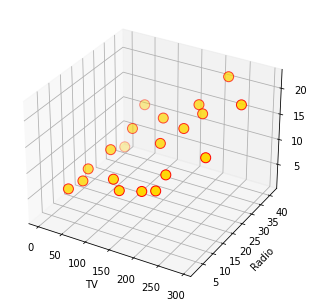

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import random

# Input vs Input
xs = dataset['TV'].values.reshape(-1,1)
ys = dataset['radio'].values.reshape(-1,1)
zs = dataset['sales'].values.reshape(-1,1)


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs[0::10], ys[0::10], zs[0::10],s=100, edgecolor="r", facecolor="gold")
plt.xlabel('TV')  
plt.ylabel('Radio') 
plt.show()

In [12]:
# linear Regression
# TV vs sales
regressor = LinearRegression()  
X_train   = dataset['TV'].values.reshape(-1,1)
y_train   = dataset['sales'].values.reshape(-1,1)
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [13]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[7.03259355]
[[0.04753664]]


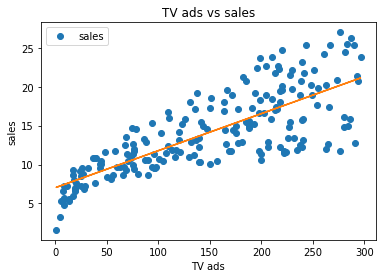

In [14]:
# Linear Regression
y_pred = regressor.predict(X_train)

# Prediction
dataset.plot(x='TV', y='sales', style='o')  
plt.title('TV ads vs sales')  
plt.xlabel('TV ads')  
plt.ylabel('sales')  
plt.plot(X_train,y_pred)  
plt.show()


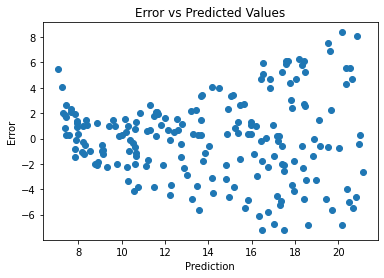

In [15]:
# Prediction Error (Residual plot Vs Prediction)
plt.plot(y_pred,y_pred-y_train,'o')  
plt.title('Error vs Predicted Values')  
plt.ylabel('Error')  
plt.xlabel('Prediction')  
plt.show()

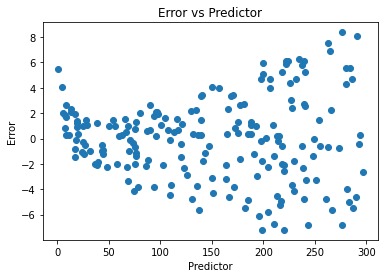

In [16]:
# Prediction Error (Residual plot Vs Predictor)
plt.plot(X_train,y_pred-y_train,'o')  
plt.title('Error vs Predictor')  
plt.ylabel('Error')  
plt.xlabel('Predictor')  
plt.show()
# what we observe here:
# The expected error is close to zero - thus, we keep x 
# The expected variance is growing, we might switch from y to sqrt(y) or log(y)

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 2.549806038927486
Mean Squared Error: 10.512652915656757
Root Mean Squared Error: 3.2423221486546887


In [18]:
# linear Regression
# TV vs sales
regressor = LinearRegression()  
X_train   = dataset['TV'].values.reshape(-1,1)
# change this to log as well
y_train   = np.sqrt(dataset['sales'].values.reshape(-1,1))
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

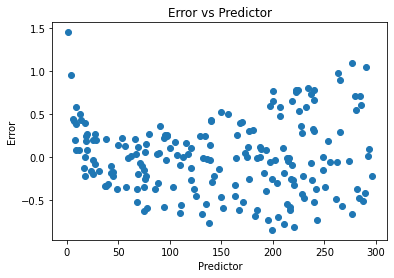

In [19]:
# Linear Regression
y_pred = regressor.predict(X_train)

# Prediction Error (Residual plot Vs Predictor)
plt.plot(X_train,y_pred-y_train,'o')  
plt.title('Error vs Predictor')  
plt.ylabel('Error')  
plt.xlabel('Predictor')  
plt.show()

In [22]:
%%html
<iframe src="https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html" width="1200" height="1000"></iframe>

In [20]:
# Note that sklearn does not provide summary for the linear regression fit; we use another package here!
# Another solution using statemodels.api
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train,X).fit()
model.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     341.5
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           5.63e-45
Time:                        10:09:56   Log-Likelihood:                -114.49
No. Observations:                 200   AIC:                             233.0
Df Residuals:                     198   BIC:                             239.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7099      0.061     44.741      0.000       2.590       2.829
x1             0.0066      0.000     18.481      0.000       0.006       0.007
==============================================================================
Omnibus:                        5.444   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.430
Skew:                          -0.403   Prob(JB):                       0.0662
Kurtosis:                       2.969   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Predict
y_pred = model.predict(X)

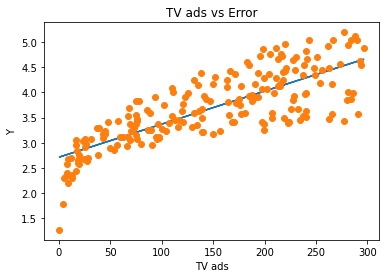

In [22]:
# Input vs Output & Prediction
plt.plot(X_train,y_pred)
plt.plot(X_train,y_train,'o')
plt.title('TV ads vs Error')  
plt.xlabel('TV ads')  
plt.ylabel('Y')  
plt.show()

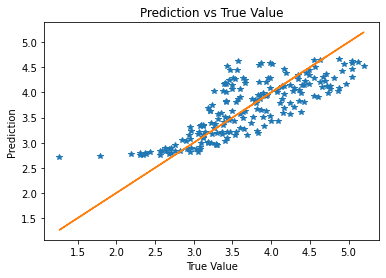

In [23]:
# Input vs Error
plt.plot(y_train,y_pred,'*')
plt.plot(y_train,y_train)
plt.title('Prediction vs True Value')  
plt.xlabel('True Value')  
plt.ylabel('Prediction')  
plt.show()

In [24]:
# Note that sklearn does not provide summary for the linear regression fit; we use another package here!
# Another Solution
import statsmodels.api as sm
X_train = dataset[['TV', 'radio']].values
X = sm.add_constant(X_train)
model = sm.OLS(y_train,X).fit()
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     700.0
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           3.01e-90
Time:                        10:10:05   Log-Likelihood:                -5.4696
No. Observations:                 200   AIC:                             16.94
Df Residuals:                     197   BIC:                             26.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1930      0.044     49.969      0.000       2.106       2.280
x1             0.0064      0.000     30.667      0.000       0.006       0.007
x2             0.0236      0.001     19.725      0.000       0.021       0.026
==============================================================================
Omnibus:                      153.553   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2146.911
Skew:                          -2.792   Prob(JB):                         0.00
Kurtosis:                      18.048   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
y_pred = model.predict(X)


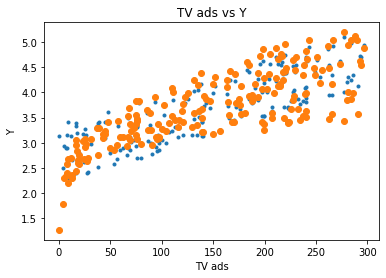

In [26]:
plt.plot(X_train[:,0],y_pred,'.')
plt.plot(X_train[:,0],y_train,'o')
plt.title('TV ads vs Y')  
plt.xlabel('TV ads')  
plt.ylabel('Y')  
plt.show()

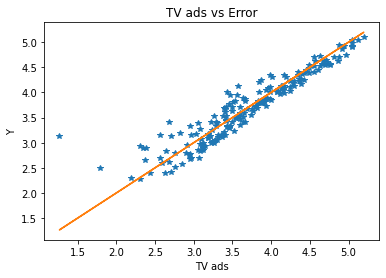

In [27]:
plt.plot(y_train,y_pred,'*')
plt.plot(y_train,y_train)
plt.title('TV ads vs Error')  
plt.xlabel('TV ads')  
plt.ylabel('Y')  
plt.show()

In [28]:
# Note that sklearn does not provide summary for the linear regression fit; we use another package here!
# Another Solution
import statsmodels.api as sm
X_train = dataset[['TV', 'radio', 'newspaper']].values
X = sm.add_constant(X_train)
model = sm.OLS(y_train,X).fit()
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     464.3
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           8.96e-89
Time:                        10:10:11   Log-Likelihood:                -5.4636
No. Observations:                 200   AIC:                             18.93
Df Residuals:                     196   BIC:                             32.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1914      0.046     47.141      0.000       2.100       2.283
x1             0.0064      0.000     30.561      0.000       0.006       0.007
x2             0.0236      0.001     18.377      0.000       0.021       0.026
x3          9.532e-05      0.001      0.109      0.913      -0.002       0.002
==============================================================================
Omnibus:                      153.105   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2123.105
Skew:                          -2.784   Prob(JB):                         0.00
Kurtosis:                      17.959   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

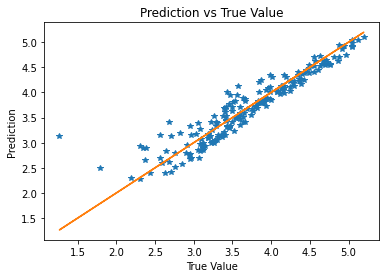

In [40]:
plt.plot(y_train,y_pred,'*')
plt.plot(y_train,y_train)
plt.title('Prediction vs True Value')  
plt.xlabel('True Value')  
plt.ylabel('Prediction')  
plt.show()